In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


LESSON_DATA_FOLDER = '../data/lesson04_titanic/'

Populating the interactive namespace from numpy and matplotlib


In [167]:
filename = LESSON_DATA_FOLDER + '/titanic_data.csv'
titanic_data = pd.read_csv(filename)

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [168]:
def is_nan(x):
    return (x == np.nan or x != x)

def parse_int (value):    
    if(np.isnan(value)):        
        return value
    else:
        return int(value);

def parse_sex (sex):
    if(sex == 'male'):
        return 1
    else:
        return 0    

def clean_up(row):   
    row['age'] = parse_int(row['Age'])
    row['male'] = parse_sex(row['Sex'])
    row['female'] = parse_sex(row['Sex']) != 1
    return row;

titanic_data = titanic_data.apply(clean_up, axis=1)
#print (titanic_data.head(10))
titanic_data.describe()
titanic_data['age']

#titanic_data[['Age']].applymap(parse_int)
#titanic_data.head()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [188]:
group_by_age = titanic_data.groupby(['age'],as_index=False)
survived_age = group_by_age.sum()[['male','female','Survived']]

#survived_age.groups

#plt.scatter(survived_age['Age'])

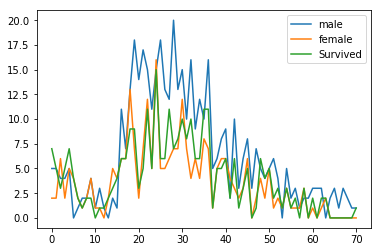

In [170]:
import seaborn as sns
survived_age.plot()


#sex = titanic_data['Sex']

#pclass = titanic_data['Pclass']

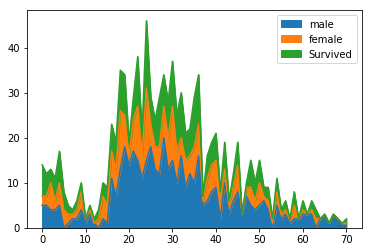

In [179]:
survived_age.plot.area()

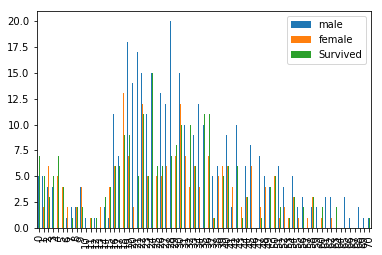

In [180]:
survived_age.plot.bar()

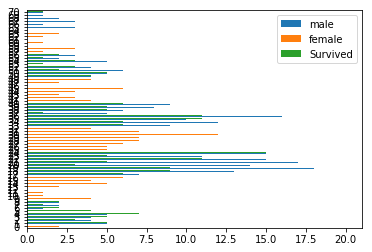

In [181]:
survived_age.plot.barh()

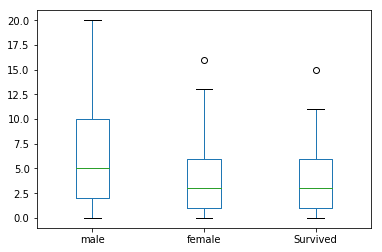

In [182]:
survived_age.plot.box()

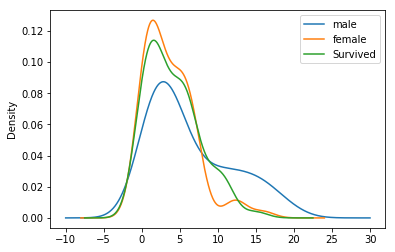

In [183]:
survived_age.plot.density()

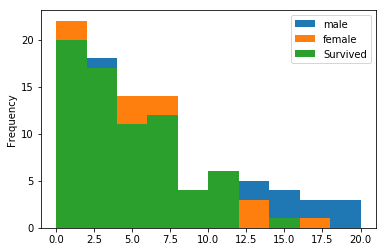

In [184]:
survived_age.plot.hist()

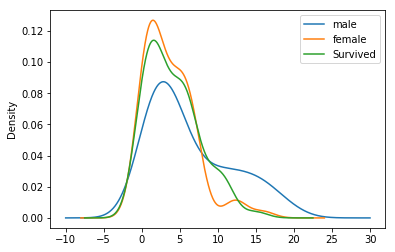

In [185]:
survived_age.plot.kde()

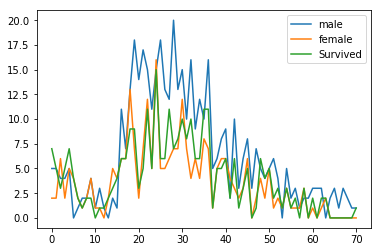

In [186]:
survived_age.plot.line()

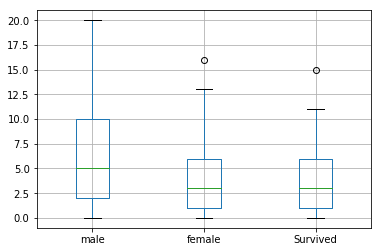

In [187]:
survived_age.boxplot()

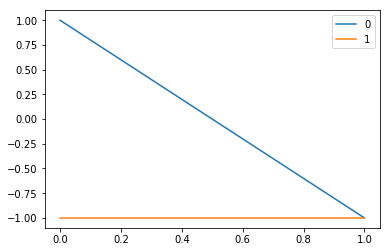

In [204]:
def standardize_data(values):    
    return (values - values.mean())/values.std(ddof=0)
    
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
        
    '''
    #print (standardize_data(x))
    #print (standardize_data(y))    
    
    return ((standardize_data(x) * standardize_data(y)).mean())

survived = titanic_data['Survived']
age = titanic_data['age']


surv_age_df = pd.DataFrame (np.corrcoef(survived, age))
surv_age_df.fillna(-1).plot()





#print (correlation(survived, age))
#print (correlation(survived, pclass))

[[ 1.         -0.54335138]
 [-0.54335138  1.        ]]


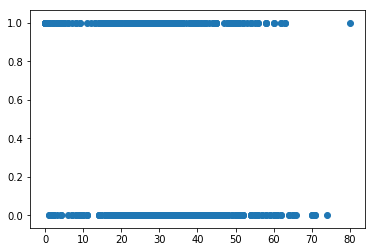

In [231]:
corr = np.corrcoef(titanic_data['Survived'], titanic_data['male'])
print (corr)



plt.scatter(titanic_data['age'], titanic_data['Survived'])
